# Code walkthrough

Generates weaving draft from tie-up, threading, and treadling patterns provided as `numpy` arrays.

Uses `skimage` to save image.

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, io, util

# Default greyscale plots
plt.gray()


# Some helpful functions for display

def display(img_array):
    """
    Uses matplotlib to display image.

    Arg:
        img_array: np array representing image
    Returns:
        Nothing, displays image.
    """
    plt.imshow(img_array)
    plt.show()


def inv(img_array):
    """ 
    We encode a white cell as 0 and a black cell as 1, but by default, 
    skimage displays 0 as black and 1 as white. This functions inverts those values for display.

    Arg:
        img_array: np array representing image 
    Returns:
        np array of the same dimensions as img_array with colours inverted
    """
    return util.invert(img_array)


def gen_bool_array(treadle_array):
    """
    Arg:
        treadle_array: array of arrays; inner arrays represent activated treadles in each row
    Returns:
        Array of arrays; for every weft row, one inner array, each containing 0 (not active)/1 (active) for every treadle.
    """
    # Find max value and add 1; this is how many treadles there are
    n_treadles = treadle_array.max() + 1

    # Init list that will contain the 0/1 values for each row.
    bool_treadle = []

    # Iterate through treadle_array.
    for curr_treadles in treadle_array:
        
        # Create zero array of length n_treadles.
        bool_row = np.zeros(n_treadles)

        # Replace the zeroes with ones at indices given in curr_treadles and append to accumulator list.
        np.put(bool_row, curr_treadles, 1)
        bool_treadle.append(bool_row)
    
    return np.array(bool_treadle)


<Figure size 432x288 with 0 Axes>

# Defining tie-up

The tie-up will be represented as an array of arrays.
There is one inner array for each harness.
Each inner array contains one element per treadle, ordered from left to right (i,e., each column of the outer array represents one treadle).
Each element in the inner array is either a 0 or 1; 0 represents that the given treadle is not tied up to the given harness (typically shown as white on a tie-up diagram), and 1 represents that the given treadle is ttied up to the given harness (typically shown as black).

Thus, the tie-up for plain weave is represented as:

```
[[0, 1],
 [1, 0]]
```

What this looks like in a typical weaving draft:

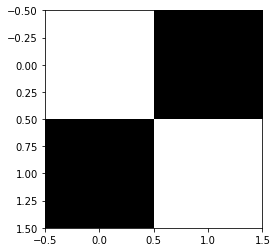

In [35]:
pw_tieup = np.array([[0, 1], [1, 0]])
display(inv(pw_tieup))


Tie-up for 2x2 twill:

```
[[0, 0, 1, 1],
 [0, 1, 1, 0],
 [1, 1, 0, 0],
 [1, 0, 0, 1]]
```

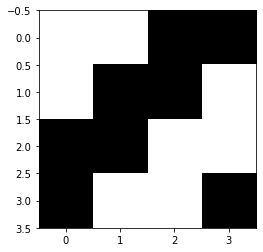

In [34]:
twill2x2_tieup = np.array([[0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1]])
display(inv(twill2x2_tieup))

# Defining treadling

The treadling will be represented as an array of arrays.
Each inner array represents a weft row, ordered from top to bottom.
Each inner array contains which treadles are pressed down on that row.

Plain weave treadling of 6 rows:

```
[[1],
 [0],
 [1],
 [0],
 [1],
 [0]]
```

In a typical weaving draft:


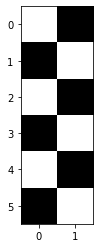

In [62]:
pw_treadle = np.array([[1], [0], [1], [0], [1], [0]])
pw_treadle_bool = gen_bool_array(pw_treadle)
display(inv(pw_treadle_bool))

2x2 twill treadling with 12 rows:

```
[[0],
 [1],
 [2],
 [3],
 [0],
 [1],
 [2],
 [3],
 [0],
 [1],
 [2],
 [3]]
```

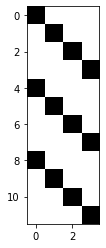

In [63]:
twill2x2_treadle = np.array([[0], [1], [2], [3], [0], [1], [2], [3], [0], [1], [2], [3]])
twill2x2_treadle_bool = gen_bool_array(twill2x2_treadle)
display(inv(twill2x2_treadle_bool))

The same 2x2 twill treadling, but with the opposite treadles pushed down (to show that the code can handle multiple treadles per row):

```
[[1, 2, 3],
 [0, 2, 3],
 [0, 1, 3],
 [0, 1, 2],
 [1, 2, 3],
 [0, 2, 3],
 [0, 1, 3],
 [0, 1, 2],
 [1, 2, 3],
 [0, 2, 3],
 [0, 1, 3],
 [0, 1, 2]]
```

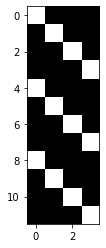

In [64]:
twill2x2_treadle_opp = np.array([[1, 2, 3], [0, 2, 3], [0, 1, 3], [0, 1, 2], [1, 2, 3], [0, 2, 3], [0, 1, 3], [0, 1, 2], [1, 2, 3], [0, 2, 3], [0, 1, 3], [0, 1, 2]])
twill2x2_treadle_opp_bool = gen_bool_array(twill2x2_treadle_opp)
display(inv(twill2x2_treadle_opp_bool))

# Defining the threading

The third and final piece of information required for generating the draw-down is the threading.
Since each warp thread (i.e., each _end_) can only go through one harness, the threading will be encoded as a one-dimensional array containing at each index the harness that the thread of that index goes through, from left to right.

Plain weave threading with 8 ends:

```
[0, 1, 0, 1, 0, 1, 0, 1]
```

In a typical weaving draft:

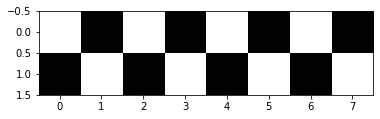

In [76]:
pw_thread = np.array([0, 1, 0, 1, 0, 1, 0, 1])
pw_thread_bool = np.rot90(gen_bool_array(pw_thread))
display(inv(pw_thread_bool))

2x2 twill threading with 16 ends:

```
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
```

We can use the same function for this as for generating the bool array for the treadling, as long a we rotate it 90 degrees to get the threading.
So, in a typical weaving draft:

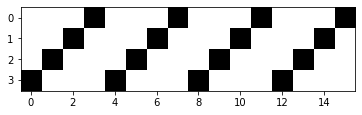

In [77]:
twill2x2_thread = np.array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])
twill2x2_thread_bool = np.rot90(gen_bool_array(twill2x2_thread))
display(inv(twill2x2_thread_bool))

# The draw-down

The fabric is generated as a function of the tie-up, treadling, and threading.